In [ ]:
#homework Edward Vrijghem: Support Vector Machines 

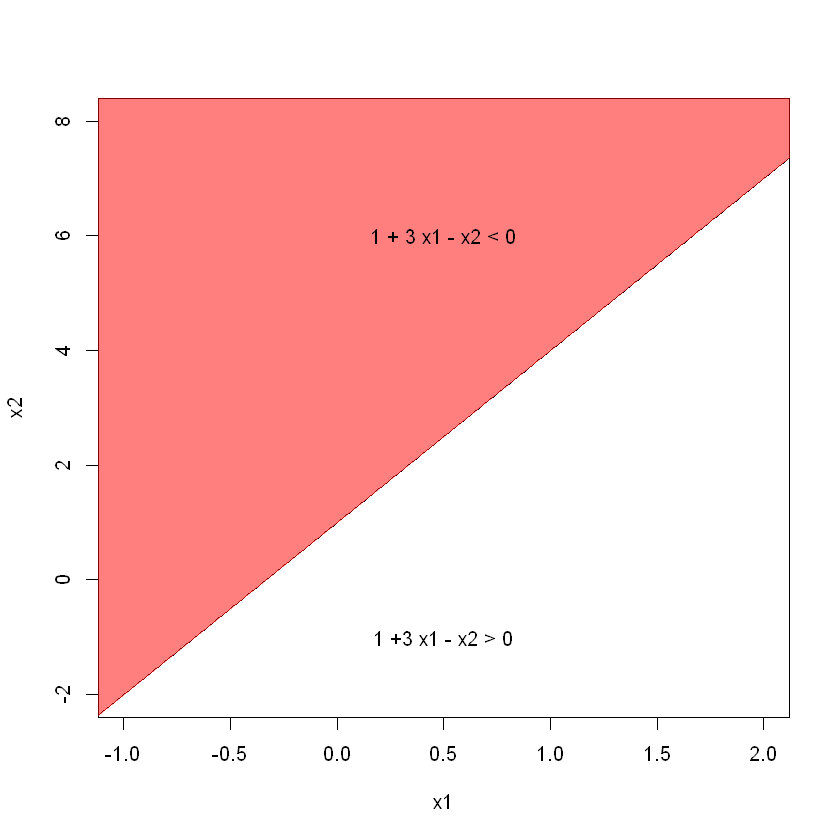

In [3]:
#excercise 1a
x1<-seq(-2,3,by=.01)
x2 <- 1+3*x1
plot(x1,x2,type="l",xlim=c(-1,2),ylim=c(-2,8))
polygon(x=c(-2,-2,3,3),y=c(x2[1],10,10,x2[length(x2)]),density=NA,col=rgb(1,0,0,.5))
text(x=.5,y=6,"1 + 3 x1 - x2 < 0")
text(x=.5,y=-1,"1 +3 x1 - x2 > 0")

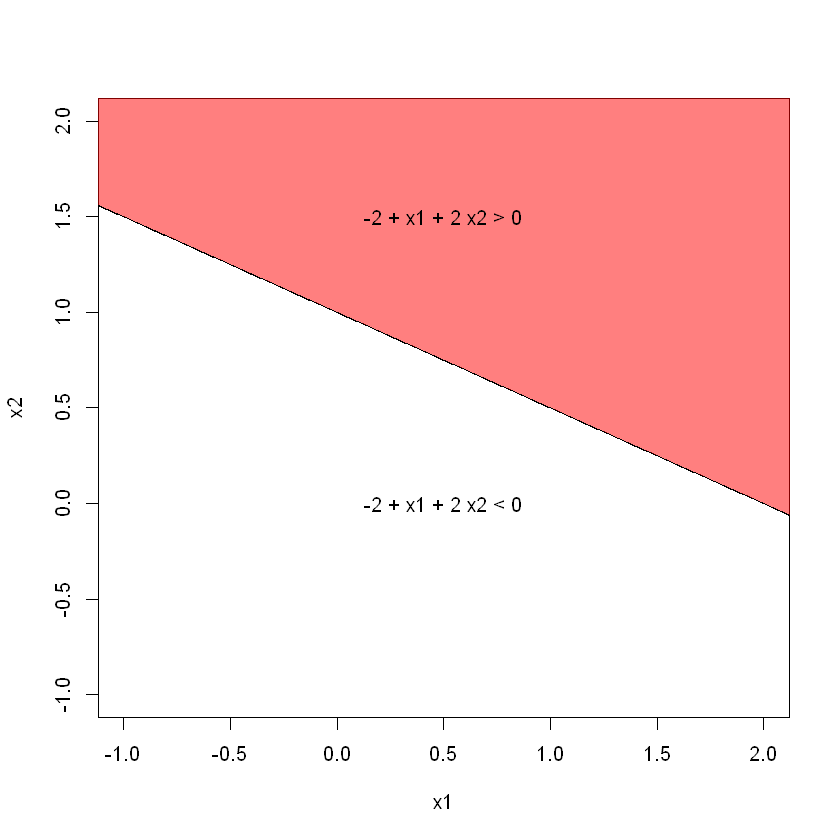

In [4]:
#1b
x2 <- 1 - .5*x1
plot(x1,x2,type="l",xlim=c(-1,2),ylim=c(-1,2))
polygon(x=c(-2,-2,3,3),y=c(x2[1],10,10,x2[length(x2)]),col=rgb(1,0,0,.5))
text(x=.5,y=1.5,"-2 + x1 + 2 x2 > 0")
text(x=.5,y=0,"-2 + x1 + 2 x2 < 0")

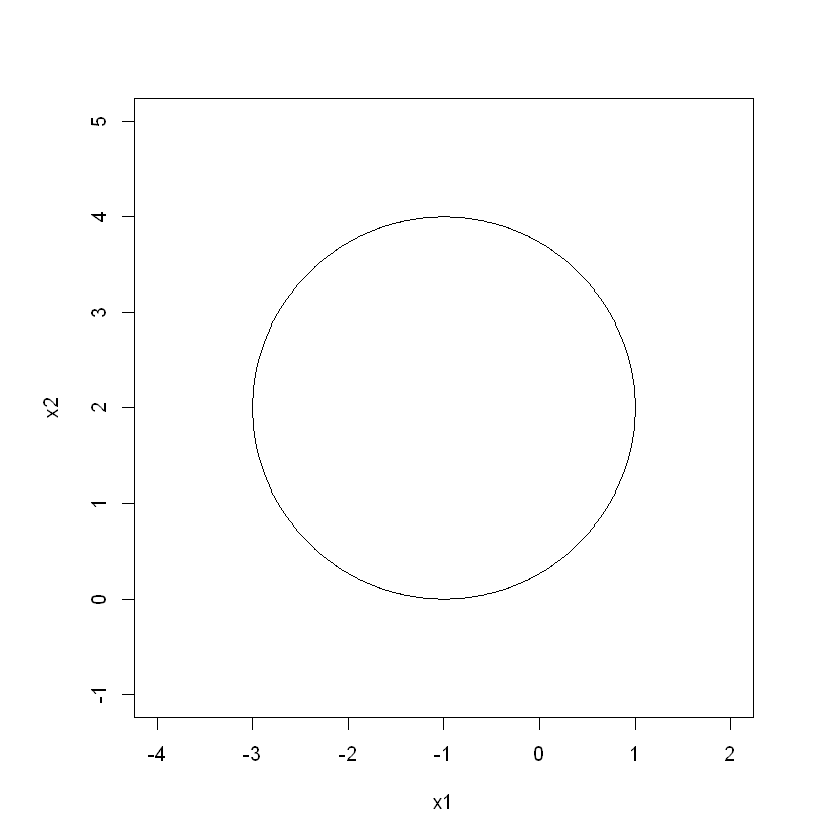

In [5]:
#2a
par(pty="s") 
plot(x=c(-4,2),y=c(-1,5),type="n",xlab="x1",ylab="x2")
x<-seq(-3,1,by=.01)
y <- sqrt(4-(x+1)^2)

xrev <- x[length(x):1]
yrev <- y[length(y):1]
polygon(c(x,xrev),c(y+2,-yrev+2))

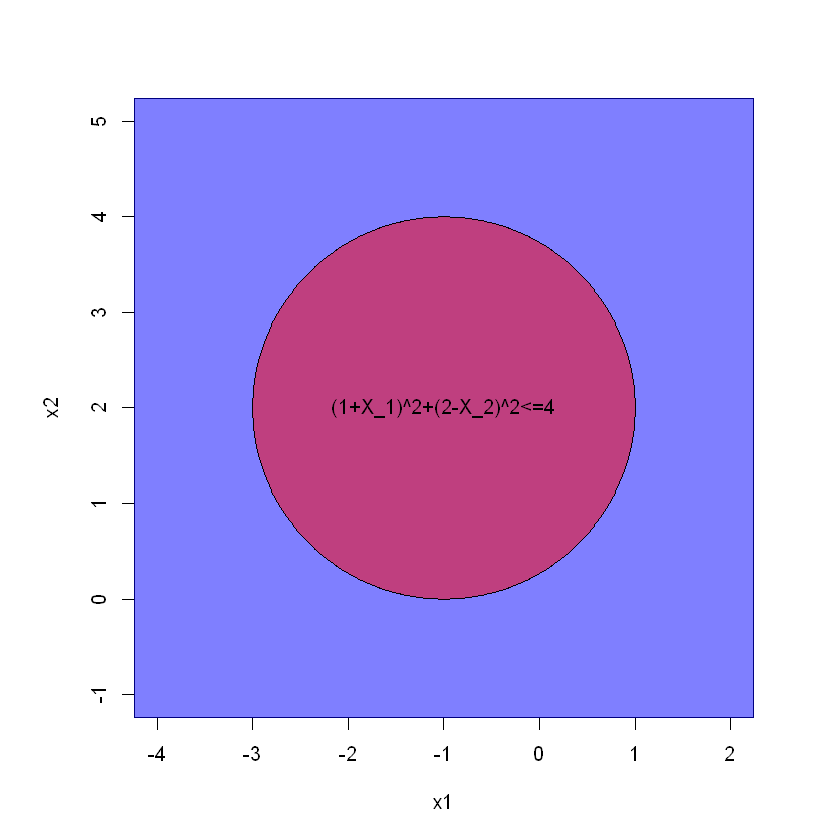

In [6]:
#2b
xrev <- x[length(x):1]
yrev <- y[length(y):1]
par(pty="s")
plot(x=c(-4,2),y=c(-1,5),type="n",xlab="x1",ylab="x2")
rect(-5,-5,10,10,col=rgb(0,0,1,.5)) 

polygon(c(x,xrev),c(y+2,-yrev+2),col=rgb(1,0,0,.5))
text(x=-1,y=2,"(1+X_1)^2+(2-X_2)^2<=4")

In [ ]:
#2c 
# points 1,3 and 4 are blue
# point 2 is red

In [ ]:
#2d
#(1+x1)^2+(2-x2)^2= 1+2*(x1)+(x1)^2+2-4*(x2)+(x2)^2

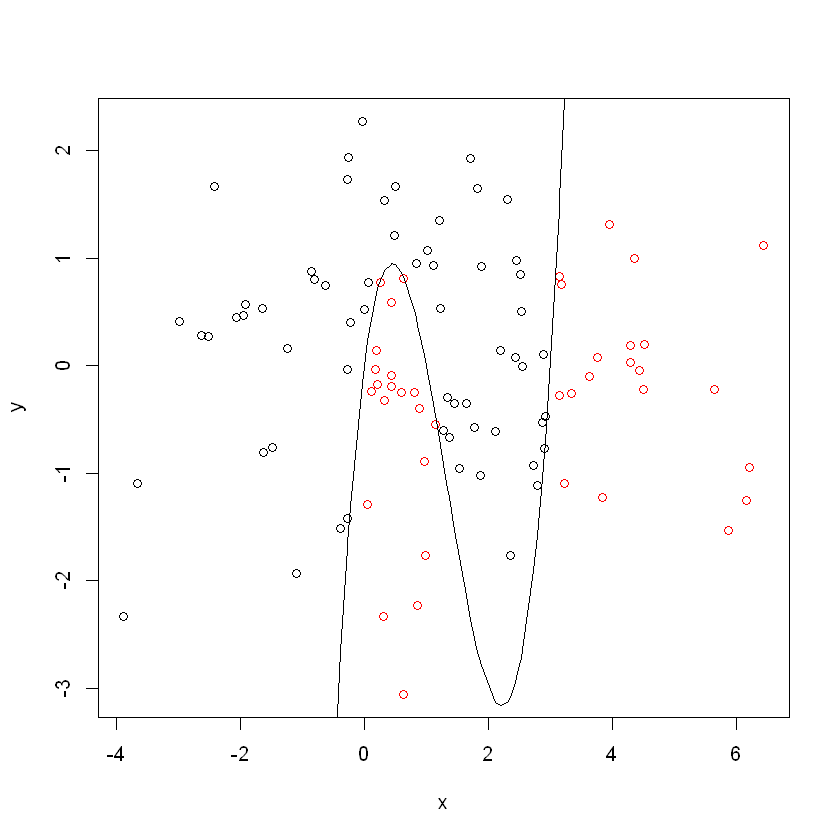

In [7]:
#exercise 4
x<-sort(rnorm(100,1,2))
y<-rnorm(100)
f <- function(x) 1.5*(x)*(x-1)*(x-3)
labs<-factor(ifelse(y>f(x),"black","red"))
plot(x,y,col=labs)
lines(x,f(x))

In [8]:
#classify with SVM 
library(e1071)
set.seed(1)
train<-sample.int(100,80)
dat <- data.frame(x,labs)
(poly.tune<-tune(svm,labs~.,data=dat[train,],kernel="polynomial",ranges=list(d=1:5,cost=c(.001,.01,.1,1,10))))

Warning message:
"package 'e1071' was built under R version 3.6.2"


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 d cost
 1  0.1

- best performance: 0.225 


In [9]:
set.seed(1)
(exp.tune <-tune(svm,labs~.,data=dat[train,],kernel="radial",ranges=list(gamma=c(.01,.05,.1,.5,1,5),cost=c(.001,.01,.1,10))))


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 gamma cost
     5   10

- best performance: 0.0875 


In [10]:
#now compare poly  vs best radial on test set
poly.mod <- svm(labs~.,data=dat[train,],kernel="polynomial",d=poly.tune$best.parameters$d,cost=poly.tune$best.parameters$cost)
exp.mod <- svm(labs~.,data=dat[train,],kernel="radial",gamma=exp.tune$best.parameters$gamma,cost=exp.tune$best.parameters$cost)
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 3.6.2"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



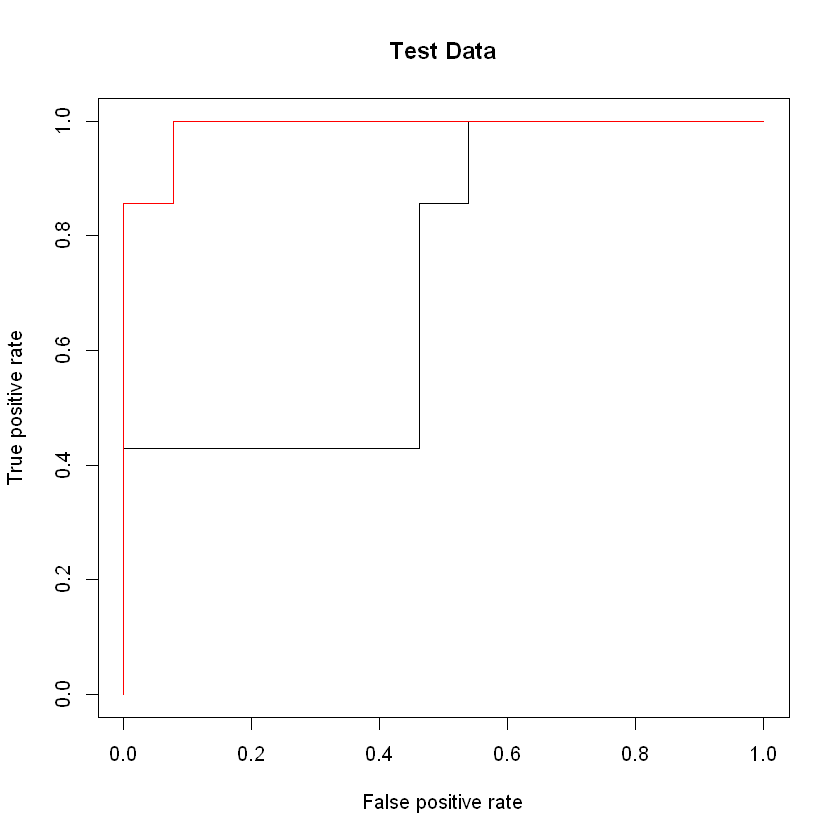

In [11]:
rocplot=function(pred, truth, ...){
  predob = prediction(pred, truth)
  perf = performance(predob , "tpr", "fpr")
  plot(perf,...)
}
fitted=attributes(predict(poly.mod,dat[-train,],decision.values=T))$decision.values
rocplot(-fitted,dat[-train,"labs"],main="Test Data") #for some reason, I have to make the 
#fitted values negative for the ROC curve to display correctly.
fitted=attributes(predict(exp.mod,dat[-train,],decision.values=T))$decision.values
rocplot(-fitted,dat[-train,"labs"],add=T,col="red")

In [12]:
#ROC shows radial is best
poly.fit=predict(poly.mod,dat[-train,])
table(poly.fit,dat[-train,]$labs)

        
poly.fit black red
   black    13   4
   red       0   3

In [13]:
exp.fit=predict(poly.mod,dat[-train,])
table(exp.fit,dat[-train,]$labs)

       
exp.fit black red
  black    13   4
  red       0   3

In [ ]:
#tables show how final models are classified, on final data results are the same

In [14]:
#exercise 7a
data(Auto,package="ISLR")
Auto$mpg01 <- with(Auto,factor(mpg > median(mpg)))

In [15]:
#7b
set.seed(1)
costs <- 10^(seq(-2,4,by=.5))
lin.res <- tune(svm, mpg01 ~ ., data=Auto, ranges=list(cost=costs), kernel="linear")
lin.res


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost
    1

- best performance: 0.01025641 


In [16]:
#7c
set.seed(2)
gammas <- 10^(seq(-3,-1,by=1))
costs2 <- 10^(seq(0,4,by=1))
rad.res <- tune(svm, mpg01 ~ ., data=Auto, ranges=list(cost=costs,gamma=gammas),kernel="radial")
summary(rad.res)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
 cost gamma
 1000 0.001

- best performance: 0.0100641 

- Detailed performance results:
           cost gamma      error dispersion
1  1.000000e-02 0.001 0.53820513 0.01986881
2  3.162278e-02 0.001 0.53820513 0.01986881
3  1.000000e-01 0.001 0.50256410 0.03803299
4  3.162278e-01 0.001 0.10185897 0.04908622
5  1.000000e+00 0.001 0.08910256 0.04472299
6  3.162278e+00 0.001 0.07641026 0.04620210
7  1.000000e+01 0.001 0.07384615 0.04687705
8  3.162278e+01 0.001 0.05352564 0.04237805
9  1.000000e+02 0.001 0.02288462 0.02226748
10 3.162278e+02 0.001 0.01262821 0.02149970
11 1.000000e+03 0.001 0.01006410 0.01754233
12 3.162278e+03 0.001 0.02288462 0.02807216
13 1.000000e+04 0.001 0.03057692 0.02638876
14 1.000000e-02 0.010 0.53820513 0.01986881
15 3.162278e-02 0.010 0.09679487 0.04882280
16 1.000000e-01 0.010 0.08397436 0.04263236
17 3.162278e-01 0.010 0.07384615 0.04529189
18 1.000000e+00 0.010 0.0

In [17]:
set.seed(3)
poly.res <- tune(svm, mpg01 ~ ., data=Auto, ranges=list(cost=costs,d=2:4),kernel="polynomial")
summary(poly.res)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
  cost d
 10000 3

- best performance: 0.07410256 

- Detailed performance results:
           cost d      error dispersion
1  1.000000e-02 2 0.55346154 0.04319433
2  3.162278e-02 2 0.55346154 0.04319433
3  1.000000e-01 2 0.55346154 0.04319433
4  3.162278e-01 2 0.55346154 0.04319433
5  1.000000e+00 2 0.55346154 0.04319433
6  3.162278e+00 2 0.55346154 0.04319433
7  1.000000e+01 2 0.49448718 0.11860041
8  3.162278e+01 2 0.39512821 0.07162437
9  1.000000e+02 2 0.30333333 0.06149155
10 3.162278e+02 2 0.28814103 0.05830417
11 1.000000e+03 2 0.22705128 0.07151055
12 3.162278e+03 2 0.15307692 0.06710409
13 1.000000e+04 2 0.14019231 0.06377126
14 1.000000e-02 3 0.55346154 0.04319433
15 3.162278e-02 3 0.55346154 0.04319433
16 1.000000e-01 3 0.55346154 0.04319433
17 3.162278e-01 3 0.55346154 0.04319433
18 1.000000e+00 3 0.55346154 0.04319433
19 3.162278e+00 3 0.55346154 0.04319433
20 1.000000e+01 3 0.55

#The error was 0.0101.

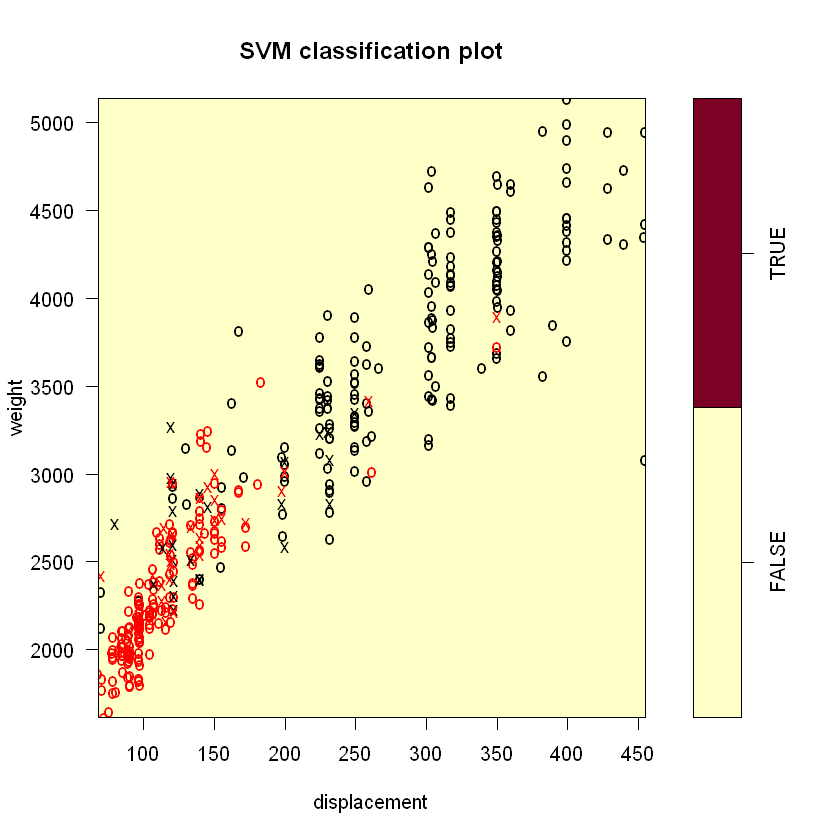

In [18]:
#7d 
svm.lin <- lin.res$best.model
plot(svm.lin, Auto, weight ~ displacement)

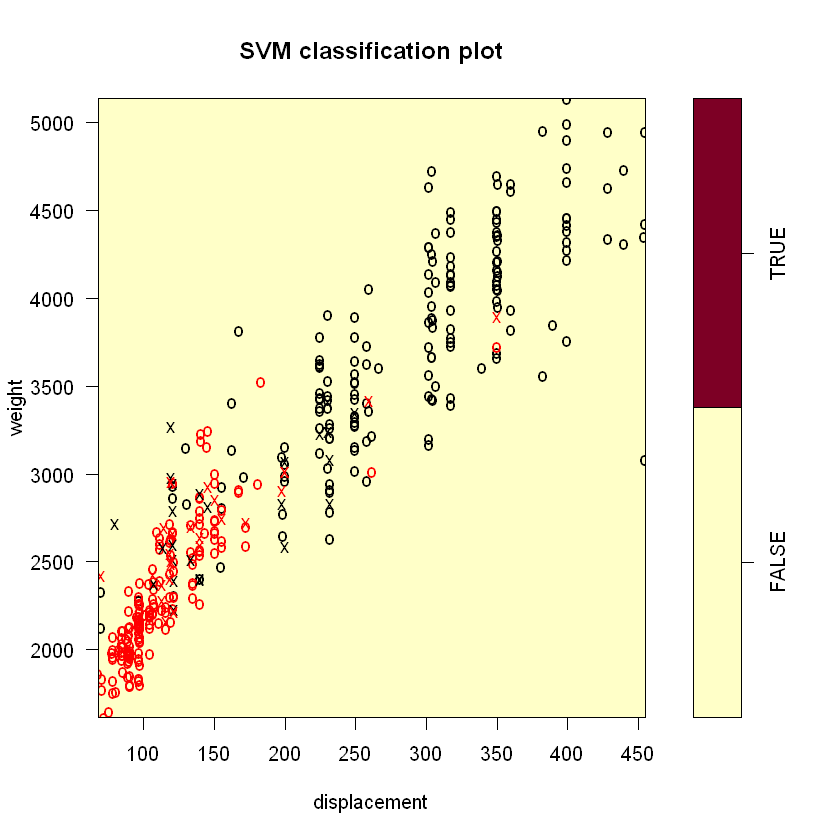

In [19]:
svm.rad <- rad.res$best.model
plot(svm.rad, Auto, weight ~ displacement)

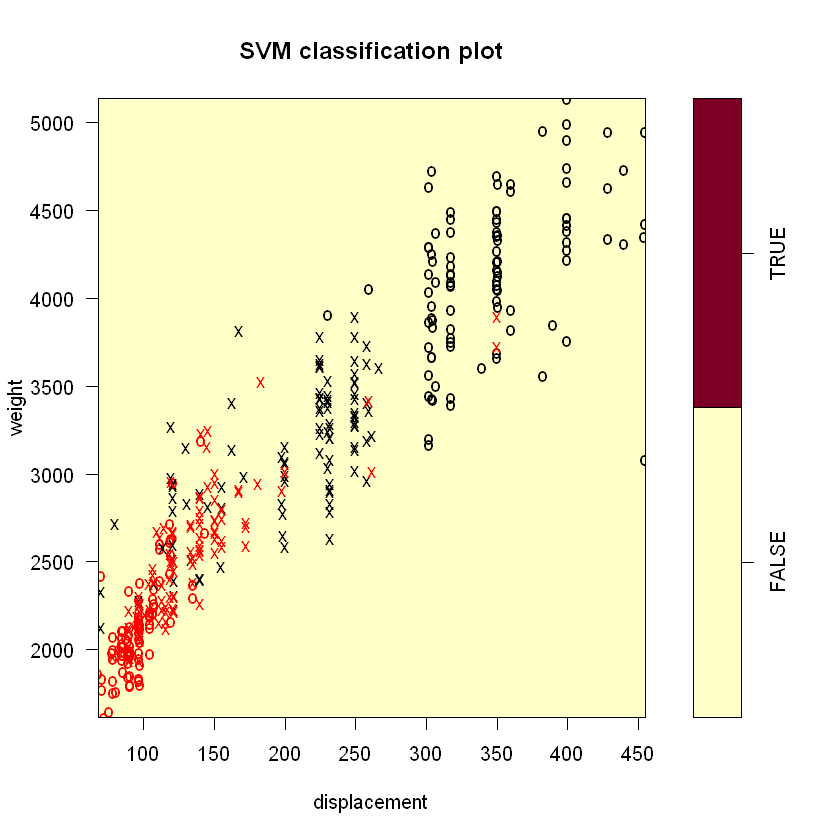

In [20]:
svm.poly <- poly.res$best.model
plot(svm.poly, Auto, weight ~ displacement)

In [21]:
#exercise 8 a
data(OJ,package="ISLR")
set.seed(927)
train <- sample.int(nrow(OJ), size=800)

In [22]:
#8b
library(e1071)
svm.class <- svm(Purchase ~ ., data=OJ[train,], cost=0.01, kernel="linear")
summary(svm.class)


Call:
svm(formula = Purchase ~ ., data = OJ[train, ], cost = 0.01, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.01 

Number of Support Vectors:  442

 ( 221 221 )


Number of Classes:  2 

Levels: 
 CH MM




In [23]:
#8c
#Training error
class.train.pred <- predict(svm.class)
pur.train <- OJ[train,"Purchase"]
(class.train.err <- mean(pur.train != class.train.pred))


[1] 0.17875

In [24]:
#Test error
class.test.pred <- predict(svm.class, OJ[-train,])
pur.test <- OJ[-train,"Purchase"]
(class.test.err <- mean(pur.test != class.test.pred))

[1] 0.137037

In [25]:
#8d
set.seed(927)
costs<-10^seq(-2,2,by=.25)
class.res <- tune(svm, Purchase ~ ., data=OJ[train,], ranges=list(cost=costs), kernel="linear")
summary(class.res)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
      cost
 0.5623413

- best performance: 0.17625 

- Detailed performance results:
           cost   error dispersion
1    0.01000000 0.18375 0.04715886
2    0.01778279 0.18250 0.05006940
3    0.03162278 0.18125 0.04535738
4    0.05623413 0.18125 0.04573854
5    0.10000000 0.18000 0.04338138
6    0.17782794 0.18125 0.04379958
7    0.31622777 0.18000 0.04609772
8    0.56234133 0.17625 0.04730589
9    1.00000000 0.17750 0.04706674
10   1.77827941 0.18125 0.04573854
11   3.16227766 0.18125 0.04573854
12   5.62341325 0.18125 0.04649149
13  10.00000000 0.18000 0.04758034
14  17.78279410 0.18125 0.04938862
15  31.62277660 0.17750 0.04993051
16  56.23413252 0.17750 0.04993051
17 100.00000000 0.17875 0.05001736


In [26]:
#8e
#Training error
#svm.best.class <- svm(Purchase ~ ., data=OJ[train,], cost=class.res$best.parameters$cost, kernel="linear")
svm.best.class <- class.res$best.model
svm.best.class.pred <- predict(svm.best.class)
(best.class.train.err <- mean(pur.train != svm.best.class.pred))

[1] 0.17375

In [27]:
#Test error
svm.best.class.test <- predict(svm.best.class, OJ[-train,])
(best.class.test.err <- mean(pur.test != svm.best.class.test))

[1] 0.1296296